<a href="https://colab.research.google.com/github/Manikandan-professional/Miscellaneous/blob/main/G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

(1) Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. 

(2) Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. 

(3) Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. 

(4) Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand **what factors are fetching more money for the houses?**

**Given Data**

(1) The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

**Minimum Requirements**

(1) **It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price.**

(2) Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


# **1. Importing the Necessary packages required**

In [88]:
import pandas as pd #To Handle DataFrames
import numpy as np  #To Handle calculation with array
from datetime import date #To Handle Date
from sklearn.model_selection import train_test_split #To Split the train and test for training
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Excel to DataFrame Conversion**

In [89]:
link_Dataset='https://raw.githubusercontent.com/Manikandan-professional/Miscellaneous/main/train.csv'
link_Dataset_csv=pd.read_csv(link_Dataset)
df=pd.DataFrame(link_Dataset_csv)
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000
7105,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.640,349177,79812,9976480
7106,P09293,T Nagar,1973,29-01-2007,63,2.0,1.0,5,Family,Yes,07-02-1972,Commercial,AllPub,Gravel,RM,2.6,2.9,4.9,3.710,885666,116535,23307000
7107,P09021,Chrompet,1023,11-05-2007,44,1.0,1.0,3,Partial,Yes,15-05-1990,House,AllPub,Pavd,RM,3.0,2.8,3.6,3.100,282319,38941,9735150


# **3. Creating a Copy of DataFrame to df1 to make use later**

In [90]:
df1=df.copy()

# **4. Table Format of Column Names**

***The Below script gives us the column names available in the dataset given to us***

In [91]:
for i in range(0,df.shape[1],1):
  if i%2==0:
      print(i+1,'.',df.columns[i],' (',df.dtypes[df.columns[i]],') ',end="-------------------")
  else:
      print(i+1,'.',df.columns[i],' (',df.dtypes[df.columns[i]],') ')
      print()

1 . PRT_ID  ( object ) -------------------2 . AREA  ( object ) 

3 . INT_SQFT  ( int64 ) -------------------4 . DATE_SALE  ( object ) 

5 . DIST_MAINROAD  ( int64 ) -------------------6 . N_BEDROOM  ( float64 ) 

7 . N_BATHROOM  ( float64 ) -------------------8 . N_ROOM  ( int64 ) 

9 . SALE_COND  ( object ) -------------------10 . PARK_FACIL  ( object ) 

11 . DATE_BUILD  ( object ) -------------------12 . BUILDTYPE  ( object ) 

13 . UTILITY_AVAIL  ( object ) -------------------14 . STREET  ( object ) 

15 . MZZONE  ( object ) -------------------16 . QS_ROOMS  ( float64 ) 

17 . QS_BATHROOM  ( float64 ) -------------------18 . QS_BEDROOM  ( float64 ) 

19 . QS_OVERALL  ( float64 ) -------------------20 . REG_FEE  ( int64 ) 

21 . COMMIS  ( int64 ) -------------------22 . SALES_PRICE  ( int64 ) 



# **5. Analysis of all Columns**

**5.1 Analysis of PRT_ID**

In [92]:
df['PRT_ID'].value_counts() #Getting the unique values in the Column PRT_ID

P06543    1
P07939    1
P06671    1
P05859    1
P06494    1
         ..
P03509    1
P05896    1
P01285    1
P08327    1
P06299    1
Name: PRT_ID, Length: 7109, dtype: int64

In [93]:
print('The total number of rows in the dataset is',df.shape[0])

The total number of rows in the dataset is 7109


**5.1.1** Since the Number of rows in the dataset is exactly equal to the PRT_ID column this clearly shows us that this a unique Items in the column. So we are removing it without any further analysis.

In [94]:
df=df.drop(columns=['PRT_ID'],axis=1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**5.2 Analysis of AREA**

**5.2.1 Representation on list of unique areas which are available in the dataset**

In [95]:
list(df['AREA'].unique())

['Karapakkam',
 'Anna Nagar',
 'Adyar',
 'Velachery',
 'Chrompet',
 'KK Nagar',
 'TNagar',
 'T Nagar',
 'Chrompt',
 'Chrmpet',
 'Karapakam',
 'Ana Nagar',
 'Chormpet',
 'Adyr',
 'Velchery',
 'Ann Nagar',
 'KKNagar']

**5.2.1 In order to make our analysis more easier we are converting the Area Names into smaller case**

In [96]:
for i in range(0,df.shape[0],1):
  df['AREA'][i]=df['AREA'][i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**5.2.1 Representation on list of unique areas which are available in the dataset after conversion of Area into Lower Case**

In [97]:
list(df['AREA'].unique())

['karapakkam',
 'anna nagar',
 'adyar',
 'velachery',
 'chrompet',
 'kk nagar',
 'tnagar',
 't nagar',
 'chrompt',
 'chrmpet',
 'karapakam',
 'ana nagar',
 'chormpet',
 'adyr',
 'velchery',
 'ann nagar',
 'kknagar']

**5.2.2 After the conversion on the list there is a important problem which needs to be addressed which is duplicates of the values with spelling error so we must merge them into for further analysis.**

**karapakkam = Merging of [karapakkam,karapakam]**

**tnagar = Merging of [tnagar,t nagar]**

**anna nagar = Merging of [anna nagar,ana nagar,ann nagar]**

**adyar = Merging of [adyar,adyr]**

**velachery = Merging of [velachery,velchery]**

**chrompet = Merging of [chrompet,chormpet,chrmpet,chrompt]**

**kk nagar = Merging of [kk nagar,kknagar]**

**Merging of Areas:**

In [98]:
for i in range(0,df.shape[0],1):
  if df['AREA'][i]=='karapakam':
    df['AREA'][i]='karapakkam'
  elif df['AREA'][i]=='ana nagar' or df['AREA'][i]=='ann nagar':
    df['AREA'][i]='anna nagar'
  elif df['AREA'][i]=='adyr':
    df['AREA'][i]='adyar'
  elif df['AREA'][i]=='velchery':
    df['AREA'][i]='velachery'
  elif df['AREA'][i]=='chormpet' or df['AREA'][i]=='chrmpet' or df['AREA'][i]=='chrompt':
    df['AREA'][i]='chrompet'
  elif df['AREA'][i]=='kknagar':
    df['AREA'][i]='kk nagar'
  elif df['AREA'][i]=='t nagar':
    df['AREA'][i]='tnagar'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is sepa

In [99]:
print('The Number of Area split before cleaning is: ',len(df1['AREA'].value_counts()))
print('The Number of Area split before cleaning is: ',len(df['AREA'].value_counts()))

The Number of Area split before cleaning is:  17
The Number of Area split before cleaning is:  7


In [100]:
area=[]
number_of_properties=[]
for i in range(-1,-len(df['AREA'].value_counts())-1,-1):
  area.append(df['AREA'].value_counts().index[i])
  number_of_properties.append(df['AREA'].value_counts()[i])

**Pictorial Representation on Area vs Number of properties in the dataset**

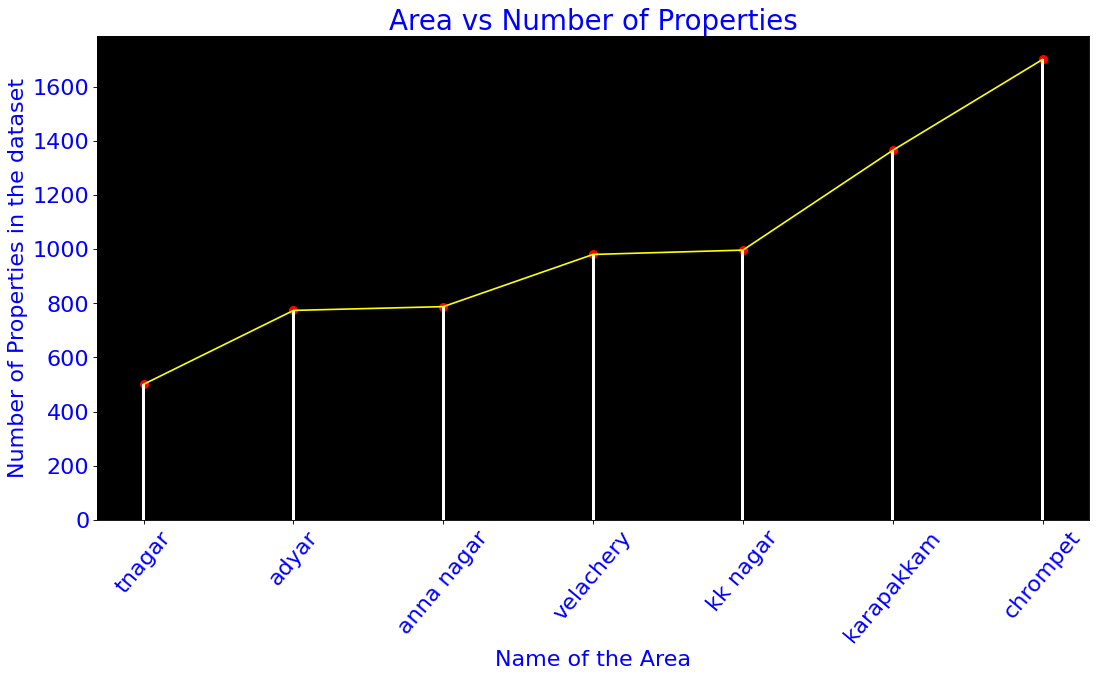

In [101]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.bar(area,number_of_properties,color='white',width=0.02)
plt.scatter(area,number_of_properties,color='red',s=50)
plt.plot(area,number_of_properties,color='yellow')
plt.title('Area vs Number of Properties',fontsize=25,color='blue')
plt.xlabel("Name of the Area",fontsize=20,color='blue')
plt.ylabel('Number of Properties in the dataset',fontsize=20,color='blue')
plt.xticks(rotation=50,fontsize=20,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.show()

# **Table Format of Null Values**

***This is a representation of Null values using the table format for easier view***

In [102]:
l1=[]
print('***********************************************')
print()
print('Name of the Column   |   Number of Null Values')
print()
for i in range(0,df.shape[1],1):
  if df[df.columns[i]].isnull().sum()>0: # Taking only the null values  
    l1.append(df.columns[i])
    print('***********************************************')
    print()
    print(df.columns[i],'                    ',df[df.columns[i]].isnull().sum())
    print()
print('***********************************************')

***********************************************

Name of the Column   |   Number of Null Values

***********************************************

N_BEDROOM                      1

***********************************************

N_BATHROOM                      5

***********************************************

QS_OVERALL                      48

***********************************************


# **Handling of Null Values**

***This particular block is used to make our decision about the Null values***

In [103]:
for i in range(0,len(l1),1):
  print('****************************************************************')
  print('Name of the Column is:                             ',l1[i])
  print('Number of Rows in',l1[i],'Column is:              ',df.shape[0])
  print('Number of Missing values in',l1[i],'Column is:      ',df[l1[i]].isnull().sum())
  print('Percentage of Missing values in',l1[i],'Column is: ',round((df[l1[i]].isnull().sum()/df.shape[0])*100,2))
print('*****************************************************************')

****************************************************************
Name of the Column is:                              N_BEDROOM
Number of Rows in N_BEDROOM Column is:               7109
Number of Missing values in N_BEDROOM Column is:       1
Percentage of Missing values in N_BEDROOM Column is:  0.01
****************************************************************
Name of the Column is:                              N_BATHROOM
Number of Rows in N_BATHROOM Column is:               7109
Number of Missing values in N_BATHROOM Column is:       5
Percentage of Missing values in N_BATHROOM Column is:  0.07
****************************************************************
Name of the Column is:                              QS_OVERALL
Number of Rows in QS_OVERALL Column is:               7109
Number of Missing values in QS_OVERALL Column is:       48
Percentage of Missing values in QS_OVERALL Column is:  0.68
*****************************************************************


# **Decision Execution - Null Values**

***1. Since there are 0.01% missing values in N_Bedroom this can be removed as we are going to loose only one row, for N_Bathroom there are 5 rows which has missing values with 0.07% missing from the rows this can also be removed. And finally QS_Overall has 0.68% missing data with 48 rows. Total of 0.74 missing values in the whole dataset and droping it will not make any difference in the dataset***

**Droping the Null values**



In [104]:
print('Number of Rows BEFORE droping the Null values rows: ',df.shape[0])
a=df.shape[0]
df=df.dropna(axis=0)
print('Number of Rows AFTER droping the Null values rows: ',df.shape[0])
b=df.shape[0]
print('Percentage of removed value is: ',100-((b/a)*100))
print('Percentage of Clean value is: ',(b/a)*100)


Number of Rows BEFORE droping the Null values rows:  7109
Number of Rows AFTER droping the Null values rows:  7056
Percentage of removed value is:  0.7455338303558818
Percentage of Clean value is:  99.25446616964412


In [105]:
# aa=df[df['AREA']=='Karapakam']
# df.drop(df['AREA']=='Karapakam',axis=0)


# **Decision Execution - Removing the Unwanted Column or Less information Columns**

In [106]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [107]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,anna nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [108]:
df=df.drop(columns=['MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS'],axis=1)
#SALE_COND
#column by column cleaning required

In [109]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,SALES_PRICE
0,karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,7600000
1,anna nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,21717770
2,adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,13159200
3,velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,9630290
4,karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,7406250


#**Area Analysis**

In [110]:
l2=list(df['AREA'].unique())
print('***********************************************************************')
for i in range(0,len(l2),1):
  print()
  print(l2[i],'------->',df[df['AREA']==l2[i]].shape)
  print('Number of properties in the dataset with ',l2[i],'as Area is: ',df[df['AREA']==l2[i]].shape[0])
  print()
  print('***********************************************************************')
#x_area,y_Noofproperties--Representationg graph
#Average price of Sales with area (interpretation-Area)

***********************************************************************

karapakkam -------> (1359, 14)
Number of properties in the dataset with  karapakkam as Area is:  1359

***********************************************************************

anna nagar -------> (777, 14)
Number of properties in the dataset with  anna nagar as Area is:  777

***********************************************************************

adyar -------> (769, 14)
Number of properties in the dataset with  adyar as Area is:  769

***********************************************************************

velachery -------> (975, 14)
Number of properties in the dataset with  velachery as Area is:  975

***********************************************************************

chrompet -------> (1691, 14)
Number of properties in the dataset with  chrompet as Area is:  1691

***********************************************************************

kk nagar -------> (990, 14)
Number of properties in the dataset with 

#**INT_SQFT Analysis**

In [111]:
l3=[]
mi1=[]
ma1=[]
av1=[]
for i in range(0,len(l2),1):
  print()
  print(l2[i],'------> Minimum Int_SquareFeet value is: ',df[df['AREA']==l2[i]]['INT_SQFT'].min(),end=" **** ")
  mi1.append(df[df['AREA']==l2[i]]['INT_SQFT'].min())
  print('Maximum Int_SquareFeet value is: ',df[df['AREA']==l2[i]]['INT_SQFT'].max(),end=" **** ")
  ma1.append(df[df['AREA']==l2[i]]['INT_SQFT'].max())
  print('Average Int_SquareFeet value is: ',df[df['AREA']==l2[i]]['INT_SQFT'].mean())
  av1.append(df[df['AREA']==l2[i]]['INT_SQFT'].mean())
  print()
  print('***********************************************************************************************************************************************************************')
#Average Sales price vs Squarefeet
#


karapakkam ------> Minimum Int_SquareFeet value is:  500 **** Maximum Int_SquareFeet value is:  1699 **** Average Int_SquareFeet value is:  1102.8837380426785

***********************************************************************************************************************************************************************

anna nagar ------> Minimum Int_SquareFeet value is:  1501 **** Maximum Int_SquareFeet value is:  2000 **** Average Int_SquareFeet value is:  1752.6821106821108

***********************************************************************************************************************************************************************

adyar ------> Minimum Int_SquareFeet value is:  600 **** Maximum Int_SquareFeet value is:  1300 **** Average Int_SquareFeet value is:  957.3120936280884

***********************************************************************************************************************************************************************

velachery ------>

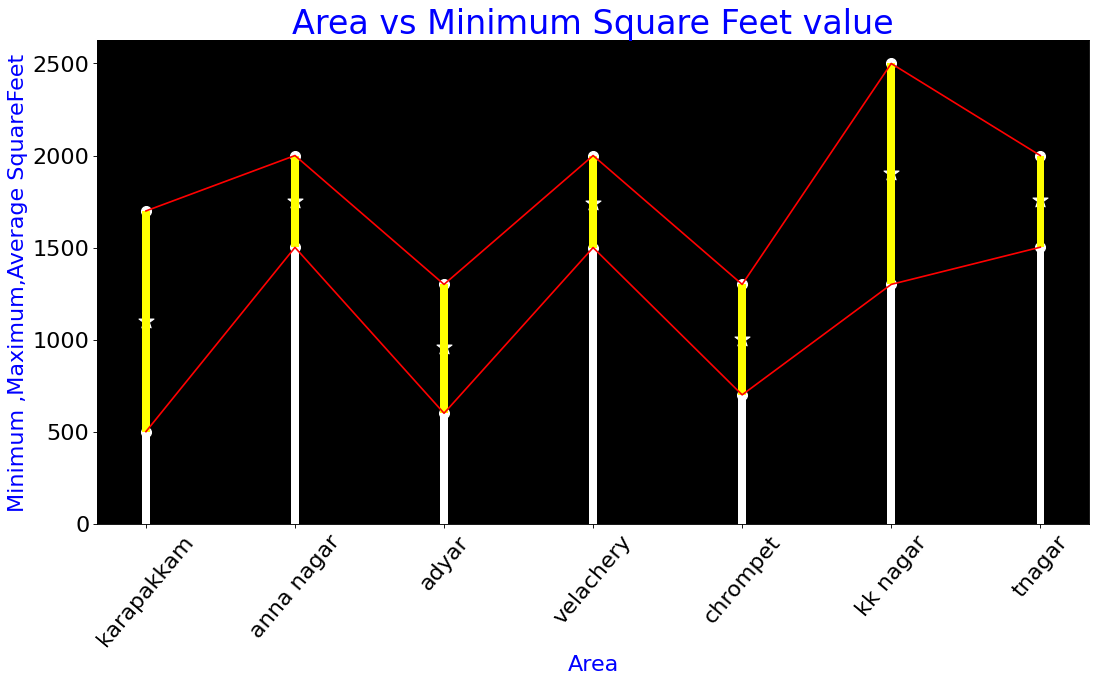

In [112]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.bar(l2,ma1,width=0.05,color='yellow')
plt.bar(l2,mi1,width=0.05,color='white')
plt.scatter(l2,mi1,color='white',s=80)
plt.scatter(l2,ma1,color='white',s=80)
plt.plot(l2,mi1,color='red')
plt.plot(l2,ma1,color='red')
plt.scatter(l2,av1,color='white',s=200,marker='*')
plt.title('Area vs Minimum Square Feet value',fontsize=30,color='blue')
plt.xlabel('Area',fontsize=20,color='blue')
plt.ylabel('Minimum ,Maximum,Average SquareFeet',fontsize=20,color='blue')
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.show()
#Sales Price target need to be used
#Target value Sales price need to adjusted with Inflation Rate(Create a column Adjusted Sales price)Inflation Rate=5%
#Age of the Building New COlumns

#**DATE_SALE and DATE_BUILD Analysis**

In [113]:
f=date(2021,5,3)
today = date(2020,5,3)
delta_difference=today-f
delta_difference.days

-365

#**DIST_MAINROAD Analysis**

In [114]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,SALES_PRICE
0,karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,7600000
1,anna nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,21717770
2,adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,13159200
3,velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,9630290
4,karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,7406250


In [115]:
for i in range(0,len(l2),1):
  print('The Minimum distance house from Mainroad in ',l2[i],'is:',df[df['AREA']==l2[i]]['DIST_MAINROAD'].min())
  print('The Maximum distance house from Mainroad in ',l2[i],'is:',df[df['AREA']==l2[i]]['DIST_MAINROAD'].max())
  print('An Average distance house from Mainroad in ',l2[i],'is:',round(df[df['AREA']==l2[i]]['DIST_MAINROAD'].mean(),2))
  print('****************************************************************')

The Minimum distance house from Mainroad in  karapakkam is: 0
The Maximum distance house from Mainroad in  karapakkam is: 200
An Average distance house from Mainroad in  karapakkam is: 101.05
****************************************************************
The Minimum distance house from Mainroad in  anna nagar is: 0
The Maximum distance house from Mainroad in  anna nagar is: 200
An Average distance house from Mainroad in  anna nagar is: 100.4
****************************************************************
The Minimum distance house from Mainroad in  adyar is: 0
The Maximum distance house from Mainroad in  adyar is: 200
An Average distance house from Mainroad in  adyar is: 101.43
****************************************************************
The Minimum distance house from Mainroad in  velachery is: 0
The Maximum distance house from Mainroad in  velachery is: 200
An Average distance house from Mainroad in  velachery is: 94.73
*********************************************************

**(1) Since there are some values of 0 in the Minimum Distance it represents that the distance between the house and the mainroad is very less or negotiable**

# **PARK_FACIL Analysis**

In [116]:
print('Park Facility available percentage in the given areas is: ',round((df[df['PARK_FACIL']=='Yes'].shape[0]/df.shape[0])*100,2))
print('Park Facility Not available percentage in the given areas is: ',100-round((df[df['PARK_FACIL']=='Yes'].shape[0]/df.shape[0])*100,2))

Park Facility available percentage in the given areas is:  50.41
Park Facility Not available percentage in the given areas is:  49.59


# **Street Analysis**

In [117]:
df['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [118]:
df=df.drop(columns=['AREA','BUILDTYPE','UTILITY_AVAIL','STREET','PARK_FACIL','DATE_SALE','DATE_BUILD'])
# le=LabelEncoder()

In [119]:
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,SALES_PRICE
0,1004,131,1.0,1.0,3,AbNormal,7600000
1,1986,26,2.0,1.0,5,AbNormal,21717770
2,909,70,1.0,1.0,3,AbNormal,13159200
3,1855,14,3.0,2.0,5,Family,9630290
4,1226,84,1.0,1.0,3,AbNormal,7406250


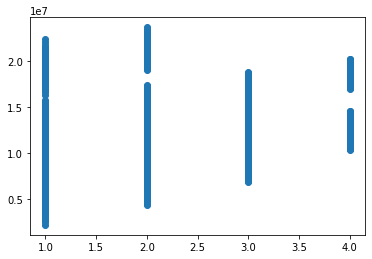

In [120]:
plt.scatter(df.N_BEDROOM,df['SALES_PRICE'])

In [121]:
# for i in range(0,df1.shape[0],1):
#   df1['AREA'][0:][i]=df1['AREA'][0:][i].lower()
# df1.columns
# df1

# **Information about the Cleaned Data**

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       7056 non-null   int64  
 1   DIST_MAINROAD  7056 non-null   int64  
 2   N_BEDROOM      7056 non-null   float64
 3   N_BATHROOM     7056 non-null   float64
 4   N_ROOM         7056 non-null   int64  
 5   SALE_COND      7056 non-null   object 
 6   SALES_PRICE    7056 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 441.0+ KB


# **Description about the Cleaned Data**

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7056.0,1.381317e+03,4.578609e+02,500.0,991.0,1369.5,1744.0,2500.0
DIST_MAINROAD,7056.0,9.956916e+01,5.740387e+01,0.0,50.0,99.0,148.0,200.0
N_BEDROOM,7056.0,1.636621e+00,8.036325e-01,1.0,1.0,1.0,2.0,4.0
N_BATHROOM,7056.0,1.213152e+00,4.095631e-01,1.0,1.0,1.0,1.0,2.0
N_ROOM,7056.0,3.686650e+00,1.020011e+00,2.0,3.0,4.0,4.0,6.0
SALES_PRICE,7056.0,1.088801e+07,3.769081e+06,2156875.0,8266790.0,10319225.0,12981477.5,23667340.0


# **Preview of the Cleaned Data**

In [124]:
df.head()


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,SALES_PRICE
0,1004,131,1.0,1.0,3,AbNormal,7600000
1,1986,26,2.0,1.0,5,AbNormal,21717770
2,909,70,1.0,1.0,3,AbNormal,13159200
3,1855,14,3.0,2.0,5,Family,9630290
4,1226,84,1.0,1.0,3,AbNormal,7406250


In [125]:
`df['BUILDTYPE'].unique()

KeyError: ignored

# **Exploratory Data Analysis**

In [ ]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.title('Index Value vs Sales Price',fontsize=30,color='blue')
plt.xlabel('Index Value',fontsize=20,color='blue')
plt.ylabel('Sales Price',fontsize=20,color='blue')
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(df.index[:],df.SALES_PRICE[:],color='white',s=10)
plt.show()

**(1) This Representation is used to see a value spread of Sales price in dataset**

In [ ]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.scatter(df['INT_SQFT'],df.SALES_PRICE[:],color='white',s=10)
plt.title('INT_SQFT vs Sales Price',fontsize=30,color='blue')
plt.xlabel('INT_SQFT',fontsize=20,color='blue')
plt.ylabel('Sales Price',fontsize=20,color='blue')
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

**(1) This Representation is used to see a value spread of INT_SQFT and Sales price in dataset**
**(2) This Representation is noted that it has some linear patterns**

In [ ]:
df=df.drop(columns=['DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM'])

# **Machine Learning Model**

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1:].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print('X',X.shape)
print('y',y.shape)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

In [ ]:
scale=StandardScaler()
scaled_X_train=scale.fit_transform(X_train)
scaled_X_train

In [ ]:
scaled_X_test=scale.fit_transform(X_test)
scaled_X_test

# **Linear Regression**

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)
print('Coefficient value',linear.coef_)
print()
print('Intercept value or constant value',linear.intercept_)
print()
pred=linear.predict(X_test)

print('R2 Score',round(metrics.r2_score(y_test,pred)*100,2))
print()
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print()
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))

# Variables Used
1.  a-->
2. l1-->Table Format of Null Values-->
3. l2-->
4. l3-->


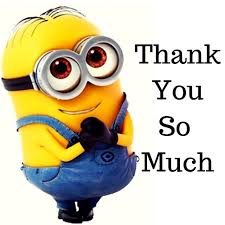